Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.2724 - val_loss: 0.2494
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2428 - val_loss: 0.2348
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2317 - val_loss: 0.2233
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2072 - val_loss: 0.2022
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1993 - val_loss: 0.1976
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1953 - val_loss: 0.1938
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1926 - val_loss: 0.1919
Epoch 8/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1904 - val_loss: 0.1899
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1885 - val_loss: 0.1881
Epoch 10/10
1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 19ms/step


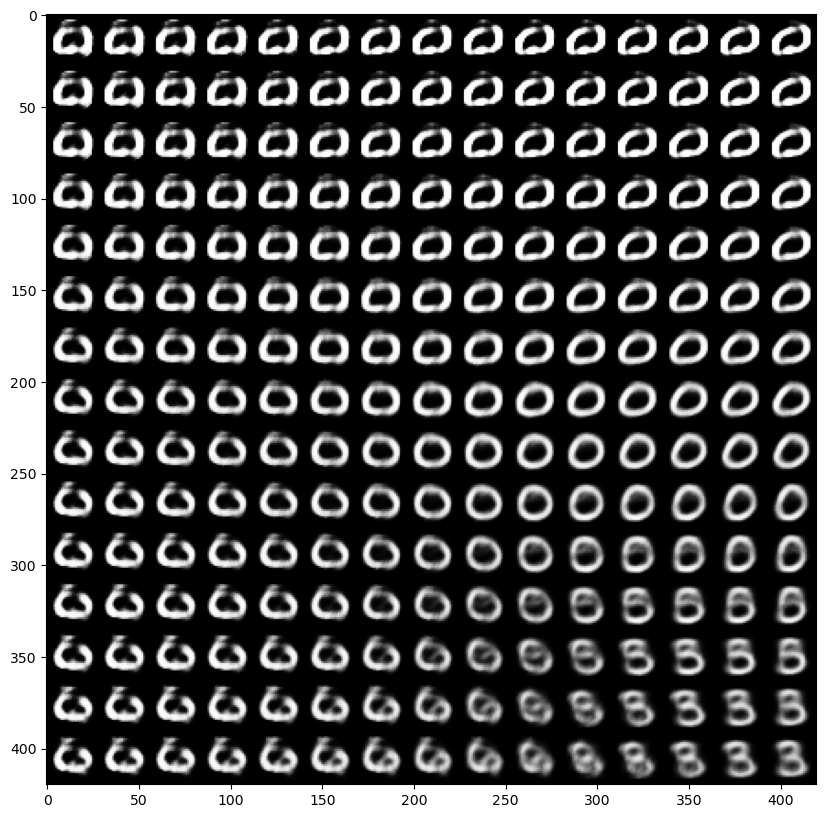

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

# Define the autoencoder architecture
latent_dim = 2  # Adjust this based on experimentation

# Encoder network
encoder_inputs = tf.keras.Input(shape=(28, 28, 1))
x = layers.Flatten()(encoder_inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
encoded = layers.Dense(latent_dim, activation="relu")(x)

# Decoder network
decoder_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(64, activation="relu")(decoder_inputs)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(784, activation="sigmoid")(x)
decoded = layers.Reshape((28, 28, 1))(x)

# Encoder and Decoder models
encoder = models.Model(encoder_inputs, encoded, name="encoder")
decoder = models.Model(decoder_inputs, decoded, name="decoder")

# Autoencoder model
autoencoder = models.Model(encoder_inputs, decoder(encoded), name="autoencoder")

# Compile the Autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Autoencoder
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test))

# Generate new images
n = 15  # Number of images to generate
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# Sample latent vectors from a normal distribution
grid_x = np.linspace(-3, 3, n)
grid_y = np.linspace(-3, 3, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size, j * digit_size: (j + 1) * digit_size] = digit

# Visualize the generated images
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()
